In [1]:
import json
import numpy as np
import pandas as pd
from copy import copy
import sys
sys.path.append('/home/ndsviriden/MinMax94/src/utils') 
from interpolation import interpolate_mmx, create_patterns
from constants import mmcc_forecast_columns 
from converters import convert_rp5_to_mmx, convert_raw_to_mmx, convert_mmx_to_mmcc_forecast, convert_raw_to_mmx, \
                convert_mmx_to_mmcc_rwis
from loaders import load_rp5_stations, load_mm94_stations
from geographical import find_nearest_wmo_station
from mmcc_input import get_station_config, get_road_config, get_rwis_data_json, get_global_forecast_json

In [2]:
mm94_station_id = 113

raw = load_mm94_stations(mm94_station_id)
mmx_rwis = convert_raw_to_mmx(raw)
mmx_rwis_interpolated = interpolate_mmx(mmx_rwis)
mmx_rwis_interpolated = create_patterns(mmx_rwis_interpolated)
mmcc_rwis = convert_mmx_to_mmcc_rwis(mmx_rwis_interpolated)
mmcc_rwis = mmcc_rwis.set_index("date_time_utc")

In [3]:
wmo_station_id = find_nearest_wmo_station(mm94_station_id)

rp5 = load_rp5_stations(wmo_station_id)
mmx_forecast = convert_rp5_to_mmx(rp5)
mmx_forecast_interpolated = interpolate_mmx(mmx_forecast)
mmx_forecast_interpolated = mmx_forecast_interpolated.set_index("date_time_utc")
#mmcc_forecast = convert_mmx_to_mmcc_forecast(mmx_forecast_interpolated)
#mmcc_forecast = mmcc_forecast.set_index("date_time_utc")
#mmcc_forecast = mmcc_forecast.replace({9999: 0})

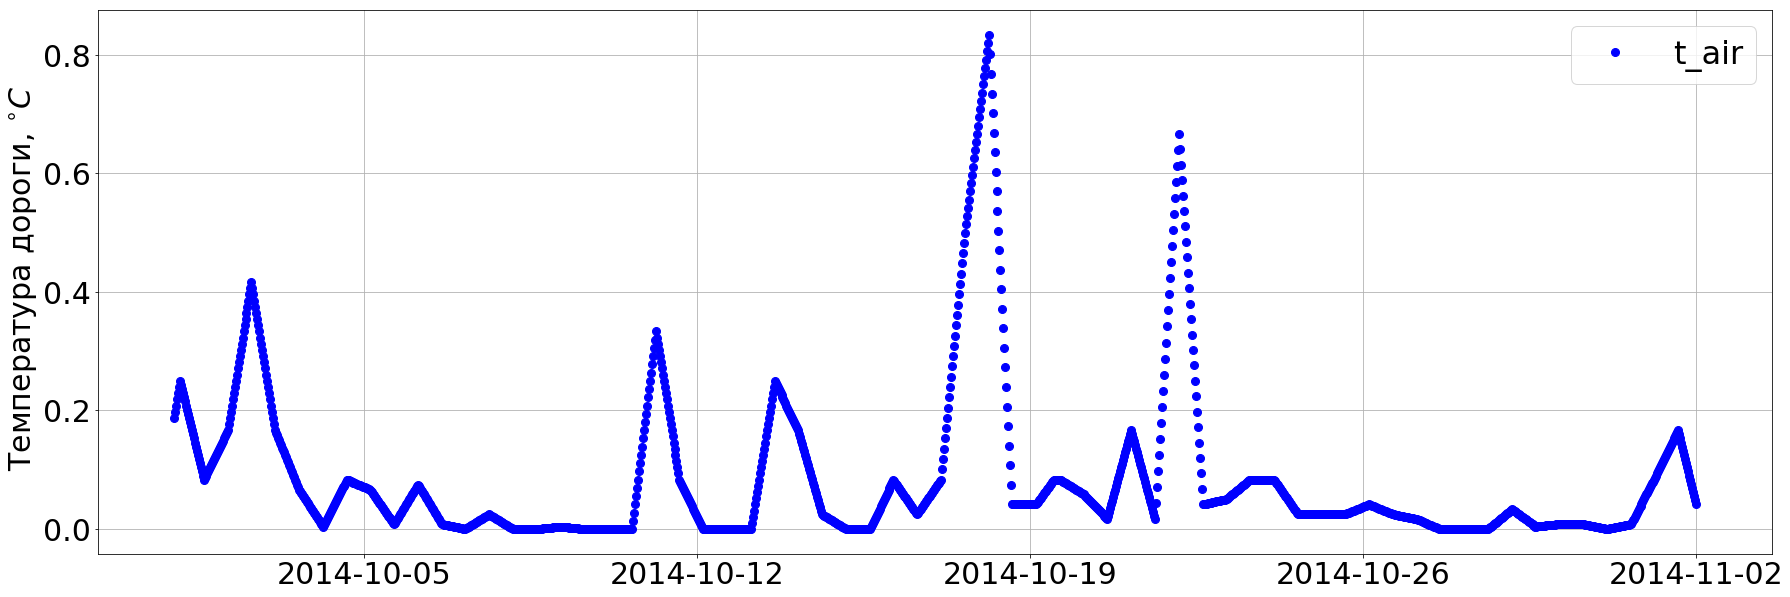

In [7]:
import matplotlib.pyplot as plt

start = pd.Timestamp(2014, 10, 1)
end = pd.Timestamp(2014, 11, 2)

to_plot = z[(z.index<=end) & (z.index>=start)]

plt.figure(figsize=(30, 10))

plt.plot_date(to_plot.index, to_plot['data_precip_count'], 'b',
                      linestyle='none', marker='o', markersize=8, label='t_air')

plt.grid()
plt.legend(fontsize=32)
plt.ylabel(r' Температура дороги, $^{\circ}C$', fontsize=30)

plt.tick_params(labelsize=30)
plt.show()

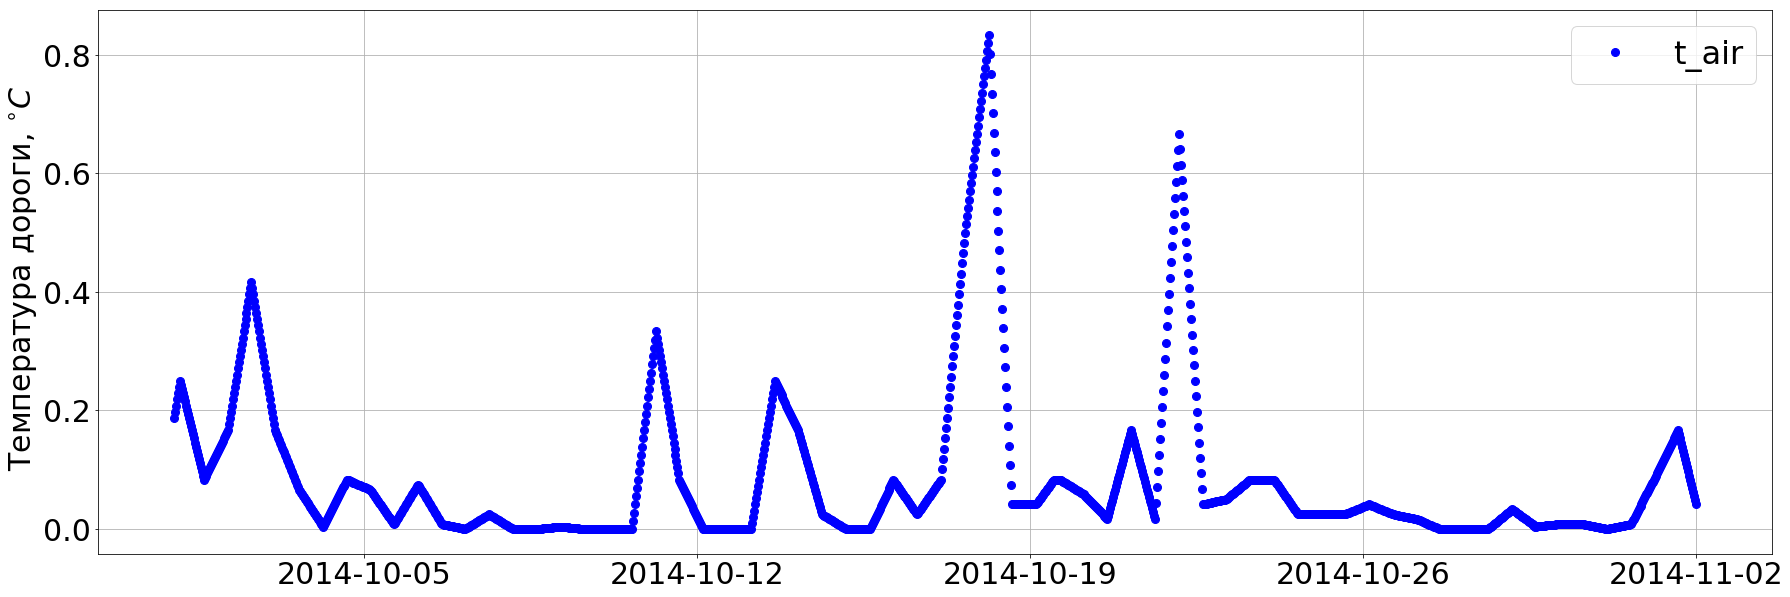

In [8]:
import matplotlib.pyplot as plt

start = pd.Timestamp(2014, 10, 1)
end = pd.Timestamp(2014, 11, 2)

to_plot = z[(z.index<=end) & (z.index>=start)]

plt.figure(figsize=(30, 10))

plt.plot_date(to_plot.index, to_plot['data_precip_count'], 'b',
                      linestyle='none', marker='o', markersize=8, label='t_air')

plt.grid()
plt.legend(fontsize=32)
plt.ylabel(r' Температура дороги, $^{\circ}C$', fontsize=30)

plt.tick_params(labelsize=30)
plt.show()